#Drive Mounting

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Load Database


In [4]:
import pandas as pd

file_path = "/content/drive/My Drive/Intern_Intelligence/Task(1)/WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Checking for Mssing Values and we convert needed datatypes


In [5]:
df.isnull().sum()
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


#Now we visualize the data

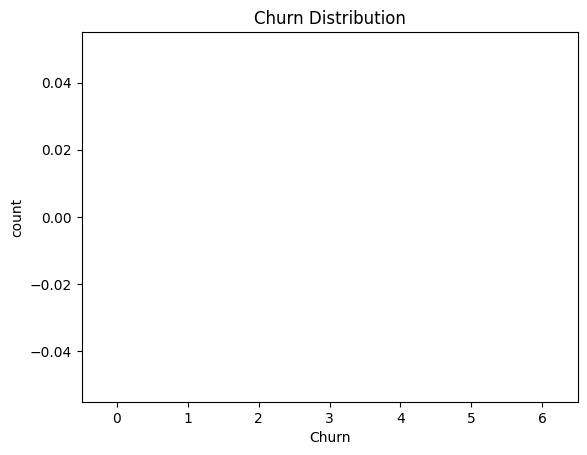

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Churn"])
plt.title("Churn Distribution")
plt.show()

#Yes and No values to 1/0 and converting other categorical columns

In [9]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df = pd.get_dummies(df, drop_first=True)


#Normalization of Numerical Features

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

KeyError: "['TotalCharges'] not in index"

In [11]:
print(df.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=13602)


In [12]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=13602)


In [16]:
df = pd.read_csv(file_path, delimiter=",", skipinitialspace=True)
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [17]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [19]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [27]:
print(df.isnull().sum())
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

customerID                                  0
gender                                      0
SeniorCitizen                               0
Partner                                  7043
Dependents                               7043
tenure                                      0
PhoneService                             7043
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                         7043
MonthlyCharges                              0
TotalCharges                                0
Churn                                    7043
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_One year                           0
Contract_Two year                 

<ipython-input-27-619f6f10cf45>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [28]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [30]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [31]:
df.drop(columns=["customerID"], inplace=True)


In [32]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (5634, 23)
Testing set size: (1409, 23)


#Training of the model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

ValueError: could not convert string to float: 'Female'

In [36]:
print(df.select_dtypes(include=['object']).columns)


Index(['gender', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')


In [38]:
df = pd.get_dummies(df, drop_first=True)


In [39]:
df["gender"] = df["gender"].map({"Female": 0, "Male": 1})


KeyError: 'gender'

In [40]:
print(df.columns)


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')


In [41]:
df.drop(columns=["gender_Female"], inplace=True, errors="ignore")

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
print(df.isnull().sum())
df.fillna(df.median(), inplace=True)
df.fillna(0, inplace=True)
df.dropna(inplace=True)


SeniorCitizen                               0
Partner                                  7043
Dependents                               7043
tenure                                      0
PhoneService                             7043
PaperlessBilling                         7043
MonthlyCharges                              0
TotalCharges                                0
Churn                                    7043
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
gender_Male                                 0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No internet service  

In [45]:
print(df.isnull().sum().sum())

0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [47]:
print(y_train.value_counts())
print(y_test.value_counts())


Churn
0.0    5634
Name: count, dtype: int64
Churn
0.0    1409
Name: count, dtype: int64


In [48]:
print(df["Churn"].value_counts())


Churn
0.0    7043
Name: count, dtype: int64


In [49]:
from sklearn.utils import resample

df_majority = df[df.Churn == 0]
df_minority = df[df.Churn == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

X = df_balanced.drop(columns=["Churn"])
y = df_balanced["Churn"]

InvalidParameterError: The 'n_samples' parameter of resample must be an int in the range [1, inf) or None. Got 0 instead.

In [50]:
print(df["Churn"].value_counts())


Churn
0.0    7043
Name: count, dtype: int64


In [51]:
from sklearn.utils import resample

df_majority = df[df.Churn == 0]
df_minority = df[df.Churn == 1]

if len(df_minority) > 0:
    df_minority_upsampled = resample(df_minority,
                                     replace=True,
                                     n_samples=len(df_majority),
                                     random_state=42)

    df_balanced = pd.concat([df_majority, df_minority_upsampled])

    X = df_balanced.drop(columns=["Churn"])
    y = df_balanced["Churn"]

    print("After balancing:")
    print(y.value_counts())
else:
    print("No Churn=1 samples found. Check dataset preprocessing.")


No Churn=1 samples found. Check dataset preprocessing.


In [52]:
print(df["Churn"].value_counts())


Churn
0.0    7043
Name: count, dtype: int64


In [53]:
import pandas as pd

file_path = "/content/drive/My Drive/Intern_Intelligence/Task(1)/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [56]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [58]:
print(df["Churn"].value_counts())

Series([], Name: count, dtype: int64)


In [59]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [63]:
print(df["Churn"].value_counts())

Series([], Name: count, dtype: int64)


In [64]:
import pandas as pd

file_path = "/content/drive/My Drive/Intern_Intelligence/Task(1)/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

print(df.columns)
print(df["Churn"].value_counts())


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [65]:
print(df["Churn"].unique())


['No' 'Yes']


In [69]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(df["Churn"].value_counts())


Series([], Name: count, dtype: int64)


In [67]:
print(df["Churn"].isnull().sum())


0


In [70]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(df["Churn"].value_counts())

Series([], Name: count, dtype: int64)


In [71]:
print(df["Churn"].unique())


[nan]


In [72]:
import pandas as pd

file_path = "/content/drive/My Drive/Intern_Intelligence/Task(1)/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [74]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(df["Churn"].value_counts())

Series([], Name: count, dtype: int64)


In [75]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [76]:
print(df["Churn"].unique())


[nan]


In [77]:
print(df["Churn"].dtype)


float64


In [78]:
print(df[["Churn"]].head(20))

    Churn
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN


In [79]:
df["Churn"] = df["Churn"].str.strip()
print(df["Churn"].unique())

AttributeError: Can only use .str accessor with string values!

In [80]:
print(df["Churn"].dtype)


float64


In [81]:
df["Churn"] = df["Churn"].astype(int)
print(df["Churn"].value_counts())

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [82]:
print(df["Churn"].isnull().sum())

7043


In [83]:
df["Churn"].fillna(df["Churn"].mode()[0], inplace=True)

KeyError: 0

In [84]:
print(df["Churn"].isnull().sum())
print(df["Churn"].dropna().unique())

7043
[]


In [85]:
import pandas as pd

file_path = "/content/drive/My Drive/Intern_Intelligence/Task(1)/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [86]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [87]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [88]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [89]:
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)


In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


ValueError: could not convert string to float: ' '

In [91]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [92]:
print(df[numeric_cols].isnull().sum())

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64


In [93]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


<ipython-input-93-59466351b608>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [95]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [96]:
X = df.drop(columns=["Churn"])
y = df["Churn"]


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: '4223-BKEOR'

In [99]:
print(X.dtypes)

customerID                                object
gender                                    object
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                             object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [100]:
X = X.drop(columns=["customerID"])
binary_cols = ["gender", "MultipleLines", "OnlineSecurity", "OnlineBackup",
               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in binary_cols:
    X[col] = X[col].map({"Yes": 1, "No": 0, "No internet service": 0, "No phone service": 0})
X = pd.get_dummies(X, drop_first=True)
print(X.dtypes)


gender                                   float64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [103]:
print(X_train.isnull().sum())

gender                                   5634
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                                0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check    

In [105]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]
model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: Found array with 0 sample(s) (shape=(0, 23)) while a minimum of 1 is required by LogisticRegression.

In [106]:
print(X_train.shape)
print(y_train.shape)

(0, 23)
(0,)


In [107]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [108]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 23)
y_train shape: (5634,)
X_test shape: (1409, 23)
y_test shape: (1409,)


In [109]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


5634
1409


In [110]:
print(X_train.dtypes)


gender                                   float64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [112]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [116]:
import numpy as np

print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in X_test:", np.isnan(X_test).sum())

print("Infinite values in X_train:", np.isinf(X_train).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum())

X_train = np.nan_to_num(X_train, nan=np.nanmedian(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmedian(X_test))

X_train = np.where(np.isinf(X_train), np.nanmedian(X_train), X_train)
X_test = np.where(np.isinf(X_test), np.nanmedian(X_test), X_test)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Missing values in X_train: 0
Missing values in X_test: 0
Infinite values in X_train: 0
Infinite values in X_test: 0


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8055
Precision: 0.6572
Recall: 0.5588
F1 Score: 0.6040


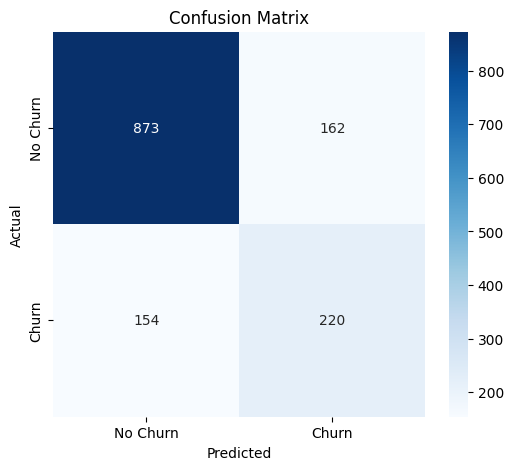

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()